<a href="https://colab.research.google.com/github/pikey-msc/Python/blob/main/M3/C5_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montecarlo

La clave de este método está en entender el término ‘simulación’. Realizar una simulación consiste en repetir, o duplicar, las características y comportamientos de un sistema real. Así pues, el objetivo principal de la simulación de Montecarlo es intentar imitar el comportamiento de variables reales para, en la medida de lo posible, analizar o predecir cómo van a evolucionar.

Lo importante es saber para qué se utiliza este método. Es decir, casos concretos para entender la importancia del método. En economía, la simulación de Montecarlo se utiliza tanto en empresas como en inversión. Siendo en el mundo de la inversión donde más se utiliza.

Algunos ejemplos de simulación de Montecarlo en inversión son los siguientes:

* Crear, valorar y analizar carteras de inversión
* Valorar productos financieros complejos como las opciones financieras
* Creación de modelos de gestión de riesgo

Dado que la rentabilidad de una inversión es impredecible, se utiliza este tipo de método para evaluar distintos tipos de escenarios.

## Área del circulo

Calcularemos un circulo con radio igual a 1, es lo mismo a decir que aproximemos el valor de π.

Esto significa muestrear aleatoriamente un universo de resultados posibles y tomar la fracción de muestras aleatorias que caen en un conjunto dado como una estimación del volumen del conjunto. La **ley de grandes números** asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras. El **teorema del límite central** proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras.



In [1]:
# importando modulos necesarios
import matplotlib.pyplot as plt 
import numpy as np # importando numpy
import pandas as pd # importando pandas
from scipy import stats

%matplotlib inline

In [2]:
np.random.seed(5) # para poder replicar el random

Para facilicartnos el procedimiento, generaremos una función.

In [4]:
def mc_pi_aprox(N):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

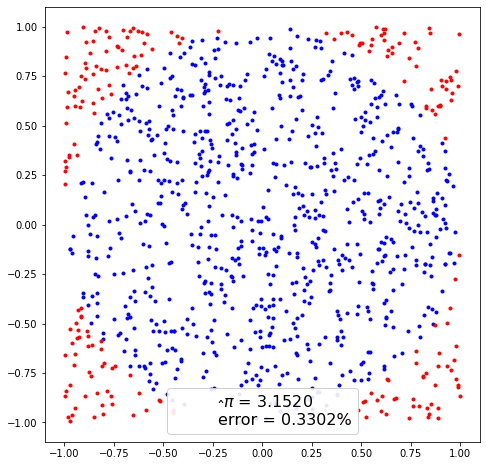

In [5]:
mc_pi_aprox(1000)

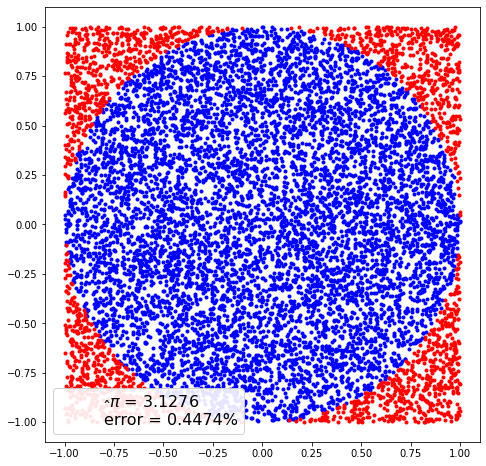

In [6]:
mc_pi_aprox(10000)

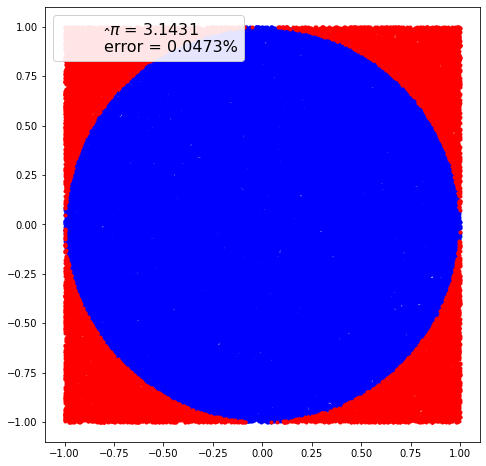

In [7]:
mc_pi_aprox(100000)

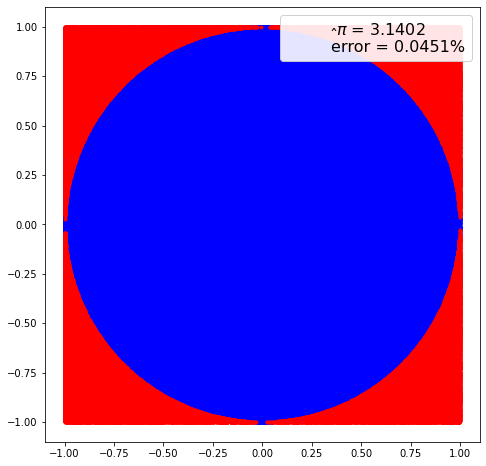

In [9]:
mc_pi_aprox(1000000)

Como vemos en este ejemplo, para calcular el área del círculo realizamos un gran número de experimentos aleatorios, en el primer ejemplo utilizamos 10,000 experimentos; y luego calculamos el área obteniendo una media aritmética de los valores que caen dentro de la superficie del círculo. Debemos hacer notar que incluso utilizando un gran número de experimentos aún así en el primer ejemplo no logramos obtener los primeros dos decimales correctos; recién en el segundo ejemplo, cuando utilizamos 100,000 experimentos logramos obtener los primeros dos dígitos correctos; esto demuestra que el Método de Monte-Carlo en su versión más cruda tarda bastante en converger al valor aproximado.

# CAPM

**Capital Asset Pricing Model**

Es un modelo de valoración de activos financieros desarrollado por William Sharpe que permite estimar su rentabilidad esperada en función del riesgo sistemático.

## ¿Cuál es la ecuación de CAPM?
$$r_i(t)=\beta_ir_m(t)+\alpha_i(t)$$
donde $i$ es una acción individual

$r_i(t)$: retorno de la acción $i$ al tiempo $t$ \\
$\beta_i$: beta de acción $i$ \\
$r_m(t)$: retorno del mercado $m$ al tiempo $t$ \\
$\alpha_i(t)$: $\alpha$ de acción $i$ al tiempo $t$ \\

$\beta$ de la acción $i$ se asocia con el riesgo que la aación añadirá al portafolio en comparación con el mercado. \\
$\beta=1$ significa que la acción está en línea con el mercado. \\
De acuerdo con el CAPM, el valor de $\alpha$ se espera que sea cero y que es aleatorio y no puede ser predecido. \\
Dicha ecuación puede verse de la forma $y=mx+b$ y puede tratarse como una regresión lineal.




In [10]:
!pip install -U yfinance
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
from scipy import stats

     |████████████████████████████████| 6.4 MB 9.6 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:

start = datetime.datetime(2020,3,8)
end = datetime.datetime(2022,3,8)

tickers_list = ['SPY','FB']

In [12]:
df = yf.download(tickers_list, start, end)
df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                    FB         SPY          FB         SPY          FB   
Date                                                                     
2020-03-09  169.500000  265.661499  169.500000  274.230011  175.000000   
2020-03-10  178.190002  279.408112  178.190002  288.420013  178.289993   
2020-03-11  170.240005  265.787384  170.240005  274.359985  175.880005   
2020-03-12  154.470001  240.357605  154.470001  248.110001  166.600006   
2020-03-13  170.279999  260.904877  170.279999  269.320007  170.789993   

                               Low                    Open              \
                   SPY          FB         SPY          FB         SPY   
Date                                                                     
2020-03-09  284.190002  165.190002  273.450012  169.600006  275.299988   
2020-03-10  288.519989  169.500000  273.500000  174.669998  284.640015   
2020-03-11  281.940002  167.660004  270.880005  174.009995  280.700012   
2020-03-12  266.660004  154.339996  247.679993  159.539993  256.000000   
2020-03-13  271.480011  157.600006  248.520004  163.529999  263.089996   

              Volume             
                  FB        SPY  
Date                             
2020-03-09  29949000  309417300  
2020-03-10  24517800  276444100  
2020-03-11  20373900  255316300  
2020-03-12  43266300  392220700  
2020-03-13  35028600  329566100

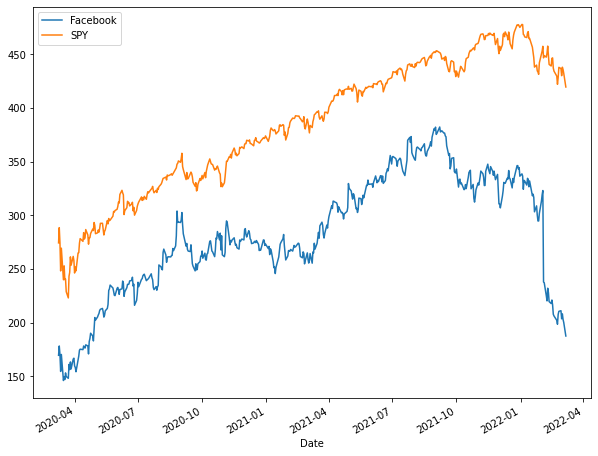

In [13]:
df.Close["FB"].plot(label='Facebook', figsize=(10,8))
df.Close["SPY"].plot(label="SPY")
plt.legend()

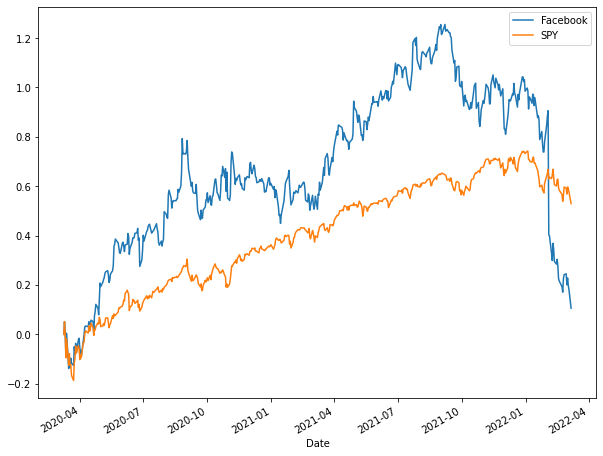

In [15]:
df['Cumu_FB'] = df.Close['FB']/df.Close['FB'].iloc[0]-1
df['Cumu_SP'] = df.Close['SPY']/df.Close['SPY'].iloc[0]-1

df['Cumu_FB'].plot(label = 'Facebook', figsize=(10,8))
df['Cumu_SP'].plot(label = 'SPY')
plt.legend()

Se determinan retornos diarios

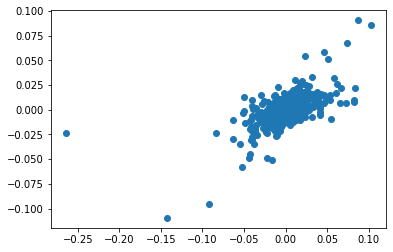

In [16]:
df['daily_ret_FB'] = df.Close['FB'].pct_change(1)
df['daily_ret_SP'] = df.Close['SPY'].pct_change(1)

plt.scatter(df['daily_ret_FB'],df['daily_ret_SP'])

## Encontrar los valores $\alpha$ y $\beta$ \\
Se encontrarán usando la paquetería de scipy a través de una regresión lineal, también se puede utilizar la multiplicación de matrices $\hat{\beta}=(X^T\cdot Y)(X^T\cdot X)^{-1}$

In [17]:
LR=stats.linregress(df['daily_ret_FB'].iloc[1:],df['daily_ret_SP'].iloc[1:])
LR

LinregressResult(slope=0.3700605383744185, intercept=0.000747276614415448, rvalue=0.6544503224299741, pvalue=8.024552065114656e-63, stderr=0.019101142257888223)

In [18]:
beta,alpha,r_val,p_val,std_err = LR
print(beta)
print(alpha)
print(p_val)
print(std_err)

0.3700605383744185
0.000747276614415448
8.024552065114656e-63
0.019101142257888223


#Frontera Eficiente

Instalamos las librerias

In [ ]:
!pip install -U yfinance
import matplotlib.pyplot as plt
import yfinance as yf

     |████████████████████████████████| 6.4 MB 18.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [19]:
#Configuración de pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)

In [20]:
tickers_list = ['AAPL','MSFT','SQ','AMZN']

In [21]:
data = yf.download(tickers_list, '2020-03-07', '2022-03-07')
data

[*********************100%***********************]  4 of 4 completed


Adj Close                                            Close                                             High               ...         Low                    Open                                          Volume                              
                  AAPL         AMZN        MSFT          SQ        AAPL         AMZN        MSFT          SQ        AAPL         AMZN  ...        MSFT          SQ        AAPL         AMZN        MSFT          SQ       AAPL      AMZN      MSFT        SQ
Date                                                                                                                                   ...                                                                                                                  
2020-03-09   65.640526  1800.609985  147.900085   65.730003   66.542503  1800.609985  150.619995   65.730003   69.522499  1862.770020  ...  150.000000   63.330002   65.937500  1773.859985  151.000000   67.209999  286744800   7813200  70419300  16418400
2020-03-10   70.368057  1891.819946  158.014069   67.239998   71.334999  1891.819946  160.919998   67.239998   71.610001  1894.270020  ...  152.580002   63.369999   69.285004  1870.880005  158.160004   68.320000  285290000   7133300  65354400  11806900
2020-03-11   67.924141  1820.859985  150.855713   62.439999   68.857498  1820.859985  153.630005   62.439999   70.305000  1871.319946  ...  151.149994   60.820000   69.347504  1857.849976  157.130005   66.349998  255598800   5624800  56371600  13618700
2020-03-12   61.216316  1676.609985  136.548813   53.570000   62.057499  1676.609985  139.059998   53.570000   67.500000  1765.000000  ...  138.580002   52.970001   63.985001  1721.979980  145.300003   55.000000  418474000  11346200  93226400  19529200
2020-03-13   68.550529  1785.000000  155.961823   57.770000   69.492500  1785.000000  158.830002   57.770000   69.980003  1786.310059  ...  140.729996   52.310001   66.222504  1755.000000  147.500000   56.740002  370732000   8809700  92727400  14666100
...                ...          ...         ...         ...         ...          ...         ...         ...         ...          ...  ...         ...         ...         ...          ...         ...         ...        ...       ...       ...       ...
2022-02-28  165.119995  3071.260010  298.790009  127.500000  165.119995  3071.260010  298.790009  127.500000  165.419998  3089.000000  ...  293.000000  118.309998  163.059998  3048.500000  294.309998  118.309998   94869100   2878500  34585700  52481700
2022-03-01  163.199997  3022.840088  294.950012  126.059998  163.199997  3022.840088  294.950012  126.059998  166.600006  3081.979980  ...  292.149994  124.361000  164.699997  3054.649902  296.399994  126.550003   83474400   2243700  31217800  25688200
2022-03-02  166.559998  3041.050049  300.190002  124.260002  166.559998  3041.050049  300.190002  124.260002  167.360001  3059.989990  ...  293.700012  118.761002  164.389999  3016.979980  295.359985  124.930000   79724800   2366700  31873000  18998500
2022-03-03  166.229996  2957.969971  295.920013  114.220001  166.229996  2957.969971  295.920013  114.220001  168.910004  3078.580078  ...  294.049988  113.080002  168.470001  3070.629883  302.890015  123.129997   76678400   3259900  27314500  18089100
2022-03-04  163.169998  2912.820068  289.859985  106.519997  163.169998  2912.820068  289.859985  106.519997  165.550003  2957.000000  ...  287.170013  105.070000  164.490005  2943.179932  294.290009  116.680000   83737200   3046700  32356500  23137800

[503 rows x 24 columns]

In [22]:
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',   'SQ'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'MSFT'),
            (    'Close',   'SQ'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'MSFT'),
            (     'High',   'SQ'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'MSFT'),
            (      'Low',   'SQ'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'MSFT'),
            (     'Open',   'SQ'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'MSFT'),
            (   'Volume',   'SQ')],
           )

In [23]:
df_precios = data[['Close']]
df_precios.head()

Close                                    
                 AAPL         AMZN        MSFT         SQ
Date                                                     
2020-03-09  66.542503  1800.609985  150.619995  65.730003
2020-03-10  71.334999  1891.819946  160.919998  67.239998
2020-03-11  68.857498  1820.859985  153.630005  62.439999
2020-03-12  62.057499  1676.609985  139.059998  53.570000
2020-03-13  69.492500  1785.000000  158.830002  57.770000

In [24]:
df_precios.isnull().sum()

Close  AAPL    0
       AMZN    0
       MSFT    0
       SQ      0
dtype: int64

In [25]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2020-03-09 to 2022-03-04
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  503 non-null    float64
 1   (Close, AMZN)  503 non-null    float64
 2   (Close, MSFT)  503 non-null    float64
 3   (Close, SQ)    503 non-null    float64
dtypes: float64(4)
memory usage: 19.6 KB


Rp = Retorno de portafolio 

Rf = Tasa libre de riesgo

sr = Desviación estándar excedente de retorno del portafolio

sr = $(Rp - Rf)/sr$

Rp = $w1*r1 + w2*r2 +...+ wk*rk$,   donde $ri$= retorno del instrumento i, y wi es la proporción que tenemos del intrumento i.

In [26]:
retornos = df_precios.pct_change().dropna()

In [27]:
retornos

Close                              
                AAPL      AMZN      MSFT        SQ
Date                                              
2020-03-10  0.072022  0.050655  0.068384  0.022973
2020-03-11 -0.034731 -0.037509 -0.045302 -0.071386
2020-03-12 -0.098755 -0.079221 -0.094838 -0.142056
2020-03-13  0.119808  0.064648  0.142169  0.078402
2020-03-16 -0.128647 -0.053697 -0.147390 -0.285615
...              ...       ...       ...       ...
2022-02-28  0.001638 -0.001466  0.004978  0.064096
2022-03-01 -0.011628 -0.015765 -0.012852 -0.011294
2022-03-02  0.020588  0.006024  0.017766 -0.014279
2022-03-03 -0.001981 -0.027320 -0.014224 -0.080798
2022-03-04 -0.018408 -0.015264 -0.020479 -0.067414

[502 rows x 4 columns]

In [28]:
retornos.sum()

Close  AAPL    1.026613
       AMZN    0.595250
       MSFT    0.767372
       SQ      0.957690
dtype: float64

In [30]:
retornos.mean()*(252)

Close  AAPL    0.515351
       AMZN    0.298811
       MSFT    0.385215
       SQ      0.480753
dtype: float64

** Pasos a seguir **

* 1. Vamos a generar muchas posibles combinaciones de los pesos wi
* 2. Calcular el Sharpe Ratio (sr).
* 3. Ver para que valores de wi se maximiza.
* 4. Ver para qué valores de wi se minimiza sr

Suponer: tengo un vector aleatorio
$X = (x1, x2,...xn)$
$w = (w1, w2, ..., wn)$ no aleatoria.

$E[w'X] = w'E[X]$: LINEALIDAD DE LA ESPERANZA
$Var(w'X)= w'Cov(X)w$  (es un escalar)

Generamos los pesos de forma aleatoria, los cuales serán fijos y de suma igual a 1

In [31]:
random_weights = np.array(np.random.random(len(tickers_list)))
norm_weights = random_weights/np.sum(random_weights)

In [32]:
norm_weights

array([0.28972791, 0.20481848, 0.39023742, 0.11521619])

Calculamos el valor esperado del retorno anualizado

In [33]:

exp_ret = np.sum(retornos.mean()*norm_weights)*252
exp_ret

0.4162293026480052

$Var(w'X) = w'Var(X)w$

In [34]:
vol = np.sqrt( np.dot(norm_weights.T, np.dot(retornos.cov()*252,norm_weights)))
vol

0.33154727341242396

Para el riskpremium calculamos la fórmula: $Rf-Rm$ anualizando la media de los retornos del SP500 menos el riskfree.

Generamos la variable de la fórmula del CAPM, stock_capm_return, y otra para el ratio Sharpe, que mide el grado de rentabilidad ajustado por el riesgo, cuanto mayor sea éste mejor.

$Sharpe$ = $\frac{\bar{r_{i}}-r_{f}}{\sigma_i}$

Suponemos que $R_f$ = 0

In [35]:
rf=0
sharpe_ratio = (exp_ret-rf)/vol

In [36]:
sharpe_ratio

1.2554146452902422

# Frontera eficiente (con simulación)

Generamos el número de portafolios a simular

In [37]:
num_of_portfolios = 100000 
numero_de_acciones = len(tickers_list)

Generamos los arreglos para llenar información

In [38]:
m_weights = np.zeros((num_of_portfolios, numero_de_acciones))
ret_arr = np.zeros(num_of_portfolios) #guardar los retornos (returns)
vol_arr = np.zeros(num_of_portfolios) #guardar las volatilidades
sharpe_arr = np.zeros(num_of_portfolios) # guardar los diferentes valores del Sharpe Ratio

Calculamos la matriz de Cov y promedio de retornos

In [39]:
# matriz de Covarianza de retornos
cov_returns = retornos.cov()
# promedio de retornos
mean_returns = retornos.mean()

In [40]:
for i in range(num_of_portfolios):
    #calcular los pesos:
    weights = np.array(np.random.random(numero_de_acciones)) #equivale a tomar una muestra de U(0,1)
    weights = weights / np.sum(weights) #normalizando los pesos para que sumen 1
    
    #llenar la matriz con los pesos:
    m_weights[i,:]= weights
    
    #calcularar el retorno
    ret_arr[i] = np.sum(mean_returns*weights)*252
    
    #calcular volatilidad
    vol_arr[i] = np.sqrt( np.dot(weights.T, np.dot(cov_returns*252,weights)))
    
    #calcular Sharpe ratio:
    sharpe_arr[i]= (ret_arr[i] -0)/vol_arr[i]   

Imprimimos resultados

In [45]:
#Combinar los cálculos anteriores
datos_simulacion = [ret_arr, vol_arr, sharpe_arr, m_weights]

df_simulacion = pd.DataFrame(data=datos_simulacion).T

#PONER nombres de las columnas:
df_simulacion.columns = ['Retornos', 'Volatilidad', 'Sharpe_Ratio', 'Pesos_portafolio']
df_simulacion = df_simulacion.infer_objects()

#imprimimos resultados:
print("="*70)
print('Resultados Simulación: ')
print('-'*70)
print(df_simulacion.head(10))
print('-'*70)
print(df_simulacion.shape)

Resultados Simulación: 
----------------------------------------------------------------------
   Retornos  Volatilidad  Sharpe_Ratio                                                                       Pesos_portafolio
0  0.439646     0.346835      1.267592   [0.3340551925202379, 0.029848052769248123, 0.49440279757104083, 0.14169395713947322]
1  0.412740     0.377951      1.092046    [0.09536157224474094, 0.13311115218578717, 0.4929289603271643, 0.27859831524230755]
2  0.443782     0.401158      1.106253    [0.31738905938658873, 0.18901333677843168, 0.14195623363949486, 0.3516413701954847]
3  0.469320     0.339042      1.384253     [0.6488488694658215, 0.0736571096803225, 0.21437564864600406, 0.06311837220785194]
4  0.438357     0.460505      0.951905   [0.19178612510725995, 0.23803586846540856, 0.059893793888076884, 0.5102842125392547]
5  0.400552     0.399893      1.001648  [0.014993895511815772, 0.23478051944272182, 0.39778143660406534, 0.35244414844139693]
6  0.436673     0.37198

In [ ]:
# df_simulacion.to_csv('2020_simulaciones_SR.csv')

Obtener el portafolio con Máximo Sharpe Ratio, y el de mínima volatilidad

In [46]:
max_sharpe = df_simulacion.loc[df_simulacion['Sharpe_Ratio'].idxmax()]
min_volatilidad = df_simulacion.loc[df_simulacion['Volatilidad'].idxmin()]


In [48]:
max_sharpe

Retornos                                                                                        0.498105
Volatilidad                                                                                      0.34912
Sharpe_Ratio                                                                                    1.426743
Pesos_portafolio    [0.8677438645362332, 0.008343690693433324, 0.11673335167562489, 0.00717909309470871]
Name: 90172, dtype: object

In [49]:
min_volatilidad

Retornos                                                                                        0.368118
Volatilidad                                                                                     0.307347
Sharpe_Ratio                                                                                    1.197727
Pesos_portafolio    [0.16355217703000588, 0.4448896691517172, 0.3909338307177421, 0.0006243231005347008]
Name: 17972, dtype: object

In [50]:
max_retorno = df_simulacion.loc[df_simulacion['Retornos'].idxmax()]

In [51]:
max_retorno

Retornos                                                                                           0.513249
Volatilidad                                                                                        0.359819
Sharpe_Ratio                                                                                       1.426411
Pesos_portafolio    [0.9683244980941573, 0.00044294607956474205, 0.00968922382730829, 0.021543331998969625]
Name: 21926, dtype: object

In [52]:
retornos.mean()*252

Close  AAPL    0.515351
       AMZN    0.298811
       MSFT    0.385215
       SQ      0.480753
dtype: float64

## Gráfica

Volatilidad (x) vs retorno (y)

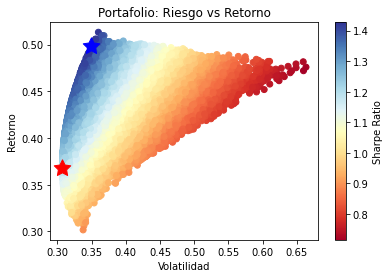

In [53]:
%matplotlib inline

plt.scatter(x=df_simulacion['Volatilidad'], y=df_simulacion['Retornos'], c= df_simulacion['Sharpe_Ratio'],
           cmap = 'RdYlBu' )
plt.title('Portafolio: Riesgo vs Retorno')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')

#Agregamos un símbolo para identificar el punto (portafolio) con max Sharpe Ratio y otro para el de mínima volatilidad
plt.scatter(max_sharpe[1], max_sharpe[0], marker=(5,1,0), color= 'b', s=300)
plt.scatter(min_volatilidad[1], min_volatilidad[0], marker=(5,1,0), color= 'r', s=300)


Para el caso de una cartera el proceso es parecido, sólo necesitaríamos realizar el mismo proceso descargando los datos para el resto de activos en la cartera y con una variable con los pesos en forma de matriz con np.array(). La beta de una cartera es la suma ponderada de las individuales.

No hemos hablado de ello pero este modelo tiene limitaciones, como absolutamente todos: Cuestiones sobre la fiabilidad de la beta, mercado eficiente, racionalidad en la toma de decisiones, horizonte temporal de inversión y expectativas sobre los retornos, información disponible para todos.

Su facilidad de aplicación hace que sea un modelo útil si lo compaginamos, por supuesto, con otras técnicas y enfoques de valoración, pero no es recomendable dejarse influir demasiado por sus resultados, más allá de la obtención de unos datos estadísticos aproximados.

### Ejercicio: Hacer este ejercicio con al menos 3 criptomonedas


#Riesgo de Mercado (Simulación Histórica)

Existen trés métodos principales para medir el riesgo de mercado
* Simulación histórica
* Paramétrico
* Simulación de Monte Carlo



   **Pérdidas y Ganancias simulación histórica (sin alisado)**
   
Un enfoque más claro es suponer que tenemos:
1.   Una matriz $X_{(n+1)\times m}$ de $m$ factores de riesgo y $n+1$ observaciones. 
2.   Denotemos el vector de precios actual como $X_{00}:=(x_{0,1},x_{0,2},\ldots,x_{0,m})$. 
3.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
4.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
5.   Sea $M_{1\times r}=(m_1,\ldots,m_r)$ el vector de posiciones nominales de cada instrumento, es decir, el número de contratos que se tienen por instrumento $m_i\in R$ $(i=1,\ldots,r)$.

In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd


In [54]:
start = '2020-01-01'

symbol = ['AAPL','MSFT','SQ','AMZN']
stock_data = yf.download(symbol,start)
# stock_data = stock_data.history(start=start)#, end=end) 
# symbol1='APPL'
# stock_data = yf.Ticker(symbol)
# stock_data = stock_data.history(start=start)#, end=end) 


[*********************100%***********************]  4 of 4 completed



##Paso 1.
 (Generación de rendimientos) Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$, es decir
		$${\Delta X}_t=\Big[ T_j(\frac{x_{t,1}}{x_{t+1,1}}), T_j(\frac{x_{t,2}}{x_{t+1,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+1,m}})\Big]\quad t=0,1,\ldots, n-1.$$

In [60]:
# yf.download?
print(stock_data.Close.head(5))

import numpy as np
X=stock_data.Close
X0=stock_data.Close.tail(1)
DeltaX=np.log(stock_data.Close/stock_data.Close.shift(1))

print(DeltaX.head())
print(X0)


                 AAPL         AMZN        MSFT         SQ
Date                                                     
2020-01-02  75.087502  1898.010010  160.619995  63.830002
2020-01-03  74.357498  1874.969971  158.619995  63.000000
2020-01-06  74.949997  1902.880005  159.029999  62.570000
2020-01-07  74.597504  1906.859985  157.580002  64.589996
2020-01-08  75.797501  1891.969971  160.089996  67.599998
                AAPL      AMZN      MSFT        SQ
Date                                              
2020-01-02       NaN       NaN       NaN       NaN
2020-01-03 -0.009770 -0.012213 -0.012530 -0.013089
2020-01-06  0.007937  0.014776  0.002581 -0.006849
2020-01-07 -0.004714  0.002089 -0.009160  0.031774
2020-01-08  0.015958 -0.007839  0.015803  0.045548
                  AAPL         AMZN        MSFT          SQ
Date                                                       
2022-03-08  157.440002  2720.290039  275.850006  100.620003


In [57]:
import pandas as pd
M=np.array([1000,5000,2000,100])
print(M)

#Valoración

Y0=X0.squeeze()*M

Y0



[1000 5000 2000  100]


AAPL    1.574400e+05
AMZN    1.360145e+07
MSFT    5.517000e+05
SQ      1.006200e+04
Name: 2022-03-08 00:00:00, dtype: float64

##Paso 2. 
Construir ${X^\ast}_{n\times m}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
		$$X_{t}^\ast=\Big[x_{0,1}T^{-1}_j(\Delta x_{t,1}), x_{0,2}T^{-1}_j(\Delta x_{t,2}),\ldots, x_{0,m}T^{-1}_j(\Delta x_{t,m})\Big]\quad (t=1,\ldots,n\quad j=1,2),$$
		donde $T_1(x)=\ln(x)$, $T_2(x)=x-1$.



In [58]:
X_s=np.exp(DeltaX.squeeze())*X0.squeeze()
X_s.head

<bound method NDFrame.head of                   AAPL         AMZN        MSFT          SQ
Date                                                       
2020-01-02         NaN          NaN         NaN         NaN
2020-01-03  155.909365  2687.268301  272.415191   99.311609
2020-01-06  158.694523  2760.783161  276.563028   99.933231
2020-01-07  156.699555  2725.979679  273.334873  103.868398
2020-01-08  159.972628  2699.048229  280.243850  105.309064
...                ...          ...         ...         ...
2022-03-02  160.681415  2736.677401  280.750672   99.183262
2022-03-03  157.128070  2645.972976  271.926236   92.490074
2022-03-04  154.541813  2678.768039  270.200984   93.836826
2022-03-07  153.705909  2567.354151  265.429277   92.109059
2022-03-08  155.601719  2691.821109  272.823581  103.829194

[550 rows x 4 columns]>

## Paso 3. 
Construcción de la matriz de reevaluación del portafolio basada en los escenarios históricos $Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$Y_t=[m_1f_1(X_{t}^\ast), m_2f_2(X_{t}^\ast),\ldots, m_rf_r(X_{t}^\ast)]\quad (t=1,\ldots,n).$$
    


In [59]:
Y_s=X_s*M.squeeze()
Y_s.head


<bound method NDFrame.head of                      AAPL          AMZN           MSFT            SQ
Date                                                                
2020-01-02            NaN           NaN            NaN           NaN
2020-01-03  155909.365145  1.343634e+07  544830.381663   9931.160882
2020-01-06  158694.522988  1.380392e+07  553126.055785   9993.323081
2020-01-07  156699.554862  1.362990e+07  546669.745338  10386.839764
2020-01-08  159972.627706  1.349524e+07  560487.700898  10530.906360
...                   ...           ...            ...           ...
2022-03-02  160681.414906  1.368339e+07  561501.343133   9918.326193
2022-03-03  157128.069865  1.322986e+07  543852.472410   9249.007435
2022-03-04  154541.812972  1.339384e+07  540401.967425   9383.682578
2022-03-07  153705.908873  1.283677e+07  530858.553099   9210.905926
2022-03-08  155601.719359  1.345911e+07  545647.161222  10382.919425

[550 rows x 4 columns]>

## Paso 4. 
Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios históricos $\Delta Y_{n\times r}$ de todos los instrumentos financieros, es decir
		$$\Delta Y_t=Y_t-Y_{0}=[m_1(f_1(X_{00})-f_1(X_{t}^\ast)), m_2( f_2(X_{00})-f_2(X_{t}^\ast)),\ldots, m_r(f_r(X_{00})-f_r(X_{t}^\ast))],$$
		para $(t=1,\ldots,n)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{n\times m}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{kt}$ $(t=1,\ldots,n)$, incluso se puede hacer lo mismo por tipo de riesgo.


In [61]:
PL=Y_s-Y0

cols=PL.shape[1]

PL['Total']=PL.sum(axis=1)
PL.head

<bound method NDFrame.head of                    AAPL           AMZN          MSFT          SQ          Total
Date                                                                           
2020-01-02          NaN            NaN           NaN         NaN       0.000000
2020-01-03 -1530.637296 -165108.688676  -6869.630544 -130.839392 -173639.795908
2020-01-06  1254.520547  202465.610530   1426.043578  -68.677193  205077.497462
2020-01-07  -740.447580   28448.197461  -5030.266869  324.839490   23002.322502
2020-01-08  2532.625265 -106209.052686   8787.688691  468.906085  -94419.832644
...                 ...            ...           ...         ...            ...
2022-03-02  3241.412464   81936.810929   9801.330926 -143.674082   94835.880237
2022-03-03  -311.932576 -371585.316485  -7847.539797 -812.992839 -380557.781698
2022-03-04 -2898.189469 -207610.000823 -11298.044782 -678.317697 -222484.552771
2022-03-07 -3734.093568 -764679.439354 -20841.459108 -851.094349 -790106.086379
2022-03-08

##Paso 5. 
Obtenerla medida de riesgo basado en un nivel de confianza de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$.

Las pérdidas y ganancias vía simulación histórica sin alisado es donde se ponderan los escenarios históricos con un mismo peso para todos, es decir cada escenario tiene una probabilidad de ocurrencia de $1/n$.

In [63]:
alpha = 0.98 #@param {type:"slider", min:0.8, max:1, step:0.001}

###Valor en Riesgo (VaR)

Es un cuantil a un $\alpha$ de confianza de la distribución de pérdidas y ganancias, generalmente se expresa en términos monetarios.

#VaR

El valor en riesgo (VaR) es una estadística utilizada para tratar de cuantificar el nivel de riesgo financiero dentro de una empresa o cartera durante un período de tiempo específico. VaR proporciona una estimación de la pérdida máxima de una posición o cartera determinada durante un período de tiempo, y puede calcularla a través de varios niveles de confianza.

Estimar el riesgo de una cartera es importante para el crecimiento del capital a largo plazo y la gestión del riesgo, en particular dentro de empresas o instituciones más grandes. El VaR generalmente se enmarca como algo como esto:

“Tenemos un VaR de cartera de 250.000 USD para el próximo mes al 95% de confianza”
Esto significa que, con un 95% de confianza, podemos decir que la pérdida de la cartera no superará los 250.000 USD en un mes.
En esta publicación, lo guiaré a través de los pasos para calcular esta métrica en una cartera de acciones.

In [67]:
VaR=PL.quantile(1-alpha, numeric_only=False)

print(VaR)

print(sum(Y0))

AAPL      -7298.874401
AMZN    -630538.408388
MSFT     -23795.190363
SQ         -813.530388
Total   -677462.575261
Name: 0.020000000000000018, dtype: float64
14320652.210235596


###Valor en Riesgo Condicional o "Expected Shortfall"

Es el promedio de las pérdidas que son más severas que el Valor en Riesgo ($VaR_\alpha$) a un $\alpha$ de confianza, es decir:
$$E(x|x\le VaR_\alpha)$$


In [68]:
def VaR_Cond(x , VaR ):
  return np.mean(x[x <= VaR])

In [69]:

VaR_C=[]

for i in range(0,PL.shape[1]):
  VC=VaR_Cond(PL.iloc[:,i],VaR[i])
  VaR_C.append(VC)


In [70]:

print(VaR)
print(VaR_C)

pd.concat([VaR,pd.DataFrame(VaR_C).squeeze()], axis=1, ignore_index=True)

AAPL      -7298.874401
AMZN    -630538.408388
MSFT     -23795.190363
SQ         -813.530388
Total   -677462.575261
Name: 0.020000000000000018, dtype: float64
[-11261.958141897987, -846332.0609951812, -36937.994447413366, -1200.8464660778375, -881792.5615757715]


,0,1
AAPL,-7298.874401,NaN
AMZN,-630538.408388,NaN
MSFT,-23795.190363,NaN
SQ,-813.530388,NaN
Total,-677462.575261,NaN
0,NaN,-11261.958142
1,NaN,-846332.060995
2,NaN,-36937.994447
3,NaN,-1200.846466
4,NaN,-881792.561576


# Riesgo de Mercado ( Paramétrico)

Las medidas de riesgo por el método paramétrico para acciones, tipo de cambio y commodities son:

$$VaR_\alpha=\mu + \sigma\cdot\Phi^{-1}(\alpha)$$

$$CVaR_\alpha=\mu + \sigma\cdot\phi(\Phi^{-1}(\alpha))$$
donde: \\

$\mu$: Es el promedio ponderado del portafolio por la media de cada instrumento financiero. \\
$\sigma=\sqrt{w\Omega w^T }$, donde $\sum_{i=1}^n w_i=1$ y $\Omega$ es la matriz de varianza covarianza. \\
$\Phi^{-1}(\cdot)$: Normal estándar inversa. \\
$\phi(\cdot)$: Densidad de la normal estándar.



In [ ]:
!pip install yfinance
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt

Crear nuestra cartera de acciones, nuestra proporción de pesos, nuestra inversión y generamos los retornos

In [ ]:
tickers = ['AAPL','MSFT','SQ','AMZN']

weights = np.array([.25, .3, .15, .3])

initial_investment = 1000000

data = yf.download(tickers, '2020-01-01')["Close"]

returns = data.pct_change()

returns.tail()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,MSFT,SQ
Date,,,,
2022-03-01,-0.011628,-0.015765,-0.012852,-0.011294
2022-03-02,0.020588,0.006024,0.017766,-0.014279
2022-03-03,-0.001981,-0.027320,-0.014224,-0.080798
2022-03-04,-0.018408,-0.015264,-0.020479,-0.067414
2022-03-07,-0.023718,-0.056220,-0.037777,-0.084585


Creamos nuestra matriz de covarianza basada en los retornos

In [ ]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,AMZN,MSFT,SQ
AAPL,0.000541,0.000322,0.000403,0.000520
AMZN,0.000322,0.000464,0.000318,0.000472
MSFT,0.000403,0.000318,0.000468,0.000534
SQ,0.000520,0.000472,0.000534,0.001813


Calculamos el promedio del portafolio y su desviación estandar

In [ ]:
avg_rets = returns.mean()

Usamos el producto matricial para normalizar las medias individuales frente a las ponderaciones de inversión y su desviación estándar

In [ ]:
port_mean = avg_rets.dot(weights)
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

Calculamos la desviación estándar de la inversión y su media

In [ ]:
mean_investment = (1+port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

Calculamos el inverso de la distribución acumulativa normal con un intervalo de confianza, una desviación estándar y una media específicos

In [ ]:
conf_level1 = 0.98 #@param {type:"slider", min:0.8, max:1, step:0.001}

Estimamos el valor en riesgo (VaR) para la cartera restando la inversión inicial del cálculo en el paso anterior

In [ ]:
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [ ]:
var_1d1 = initial_investment - cutoff1
var_1d1

-50294.14324976527

Valor en riesgo durante un período de tiempo de n días
¿Qué pasaría si quisiéramos calcular esto en una ventana de tiempo más grande? A continuación, podemos hacerlo fácilmente simplemente tomando nuestro VaR de 1 día y multiplicándolo por la raíz cuadrada del período de tiempo (esto se debe al hecho de que la desviación estándar de los rendimientos de las acciones tiende a aumentar con la raíz cuadrada del tiempo).

In [ ]:
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

1 day VaR @ 95% confidence: -50294.14
2 day VaR @ 95% confidence: -71126.66
3 day VaR @ 95% confidence: -87112.01
4 day VaR @ 95% confidence: -100588.29
5 day VaR @ 95% confidence: -112461.12
6 day VaR @ 95% confidence: -123194.99
7 day VaR @ 95% confidence: -133065.8
8 day VaR @ 95% confidence: -142253.32
9 day VaR @ 95% confidence: -150882.43
10 day VaR @ 95% confidence: -159044.05
11 day VaR @ 95% confidence: -166806.8
12 day VaR @ 95% confidence: -174224.02
13 day VaR @ 95% confidence: -181338.11
14 day VaR @ 95% confidence: -188183.45
15 day VaR @ 95% confidence: -194788.38


Gráfica

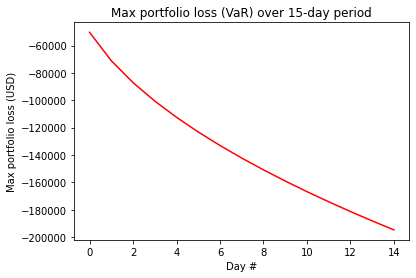

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

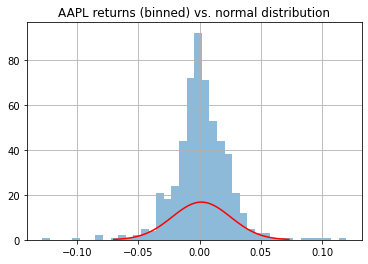

In [ ]:
import matplotlib.mlab as mlab
import scipy

returns['AAPL'].hist(bins=40, histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

Ejercicio: Calcular CVaR

## Riesgo de mercado ( Simulación Montecarlo [Cholesky])

1. Construir ${\Delta X}_{n\times m}$ que es la matriz de diferencias basados en el operador $T_j$ (		donde $T_1(x)=\ln(x)$ ó $T_2(x)=x-1$), es decir $${\Delta X}_\tau=\Big[ T_j(\frac{x_{t,1}}{x_{t+\tau,1}}), T_j(\frac{x_{t,2}}{x_{t+\tau,2}}),\ldots, T_j(\frac{x_{t,m}}{x_{t+\tau,m}})\Big]\quad t=0,1,\ldots, n-1.$$
2. Calcular la matriz de correlación de ${\Delta X}_\tau$, i.e. $\Omega=Corr({\Delta X}_\tau)$. \\
3. Factorizar $\Omega=AA^\top$. \\
4. Analizar la distribución individual de las variaciones de los factores de riesgo ${\Delta X}_{\tau,k}$ ($k=1,\ldots,m$) para ajustar a una función de distribución paramétrica conocida ó utilizar la función empírica tal cual.
5. Calcular matriz $S$ de $N\times m$ valores con $$S_{i\cdot}=\Big[F^{-1}_{{\Delta X}_{\tau,1}}(\alpha_{i 1}),\ldots,F^{-1}_{{\Delta X}_{\tau,m}}(\alpha_{i m})\Big]$$ donde $\alpha_{i\cdot}\sim U(0,1)$ con $N\times m$ valores a.i.i.d. simulados, y $F^{-1}_{{\Delta X}_{\tau,k}}$ es la inversa de la distribución empírica o paramétrica (seleccionada en el paso anterior) de las variaciones del factor de riesgo $k$, i.e. de ${\Delta X}_{\tau,k}$ ($k=1,\ldots,m$).
6. Calcular matriz $\Delta X_{s_\tau}$ como $\Delta X_{s_\tau}=S\cdot A^\top$. 
7. Construir ${X}_{s_{N\times m}}$ que es la matriz de factores de riesgo simulada basada en el vector de precios actual $X_{00}$
$$X_{s_{i\cdot}}=\Big[x_{0,1}T^{-1}_j(\Delta x_{s_{i1}}), \ldots, x_{0,m}T^{-1}_j(\Delta x_{s_{im}})\Big]\quad (i=1,\ldots,N\quad j=1\, \textrm{ó}\, 2),$$
8. Construcción de la matriz de reevaluación del portafolio basada en los escenarios simulados $Y_{N\times r}$ de todos los instrumentos financieros, es decir $$Y_z=[m_1f_1(X_{s_z}), m_2f_2(X_{s_z}),\ldots, m_rf_r(X_{s_z})]\quad (z=1,\ldots,N).$$
9. Construcción de la matriz de pérdidas y ganancias del portafolio basada en los escenarios simulados $\Delta Y_{N\times r}$ de todos los instrumentos financieros, es decir $$\Delta Y_{z\cdot}=Y_z-Y_{0}=[m_1(f_1(X_{s_{z\cdot}})-f_1(X_{00})),\ldots, m_r(f_r(X_{s_{z\cdot}})-f_r(X_{00}))],$$
 para $(z=1,\ldots,N)$. Se puede obtener el vector de pérdidas totales ${\Delta YT}_{N}$ muy fácilmente, esto es $\Delta YT=\sum_{k=1}^r Y_{z\cdot}$ $(z=1,\ldots,N)$, incluso se puede hacer lo mismo por tipo de riesgo, ya que para cada tipo de riesgo pueden existir diferentes instrumentos, lo único que se tiene que hacer es sumar los instrumentos de un mismo tipo de riesgo por escenario.
10. Obtener las medidas de riesgo deseada de la matriz ${\Delta Y}_{\cdot k}$ $(k=1,\ldots,r)$ y $\Delta YT$, ejemplo se puede calcular $VaR_\alpha({\Delta Y}_{\cdot k})$, $CVaR_\alpha({\Delta Y}_{\cdot k})$, $CeR_\alpha({\Delta Y}_{\cdot k})$, $\mu(\Delta Y_{\cdot k})$, $\sigma(\Delta Y_{\cdot k})$, etc. para $k=1,\ldots,r$. 


In [ ]:
## Resolver